In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  


In [6]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')


In [9]:
# ## Data Cleaning & Preprocessing

# Convert date column and filter data
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
covid_df = df[df['location'].isin(countries)].copy()

# Handle missing values
columns_to_keep = ['date', 'location', 'total_cases', 'new_cases', 
                  'total_deaths', 'new_deaths', 'total_vaccinations', 
                  'people_vaccinated', 'population']
covid_df = covid_df[columns_to_keep].ffill()

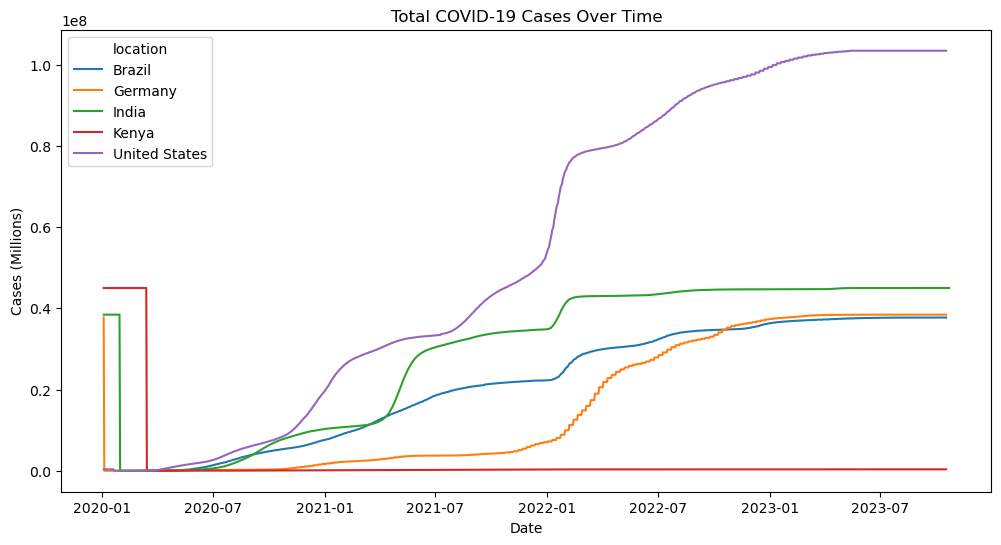

In [10]:
# ## Exploratory Data Analysis

# Time series analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.ylabel('Cases (Millions)')
plt.xlabel('Date')
plt.show()


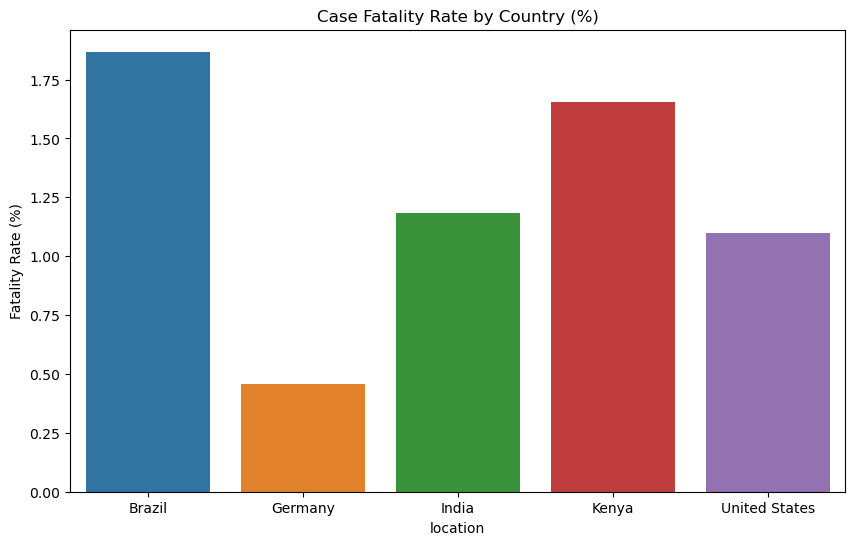

In [11]:
# Death rate calculation
covid_df['death_rate'] = (covid_df['total_deaths'] / covid_df['total_cases']) * 100
latest_data = covid_df.groupby('location').last().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='death_rate', data=latest_data)
plt.title('Case Fatality Rate by Country (%)')
plt.ylabel('Fatality Rate (%)')
plt.show()

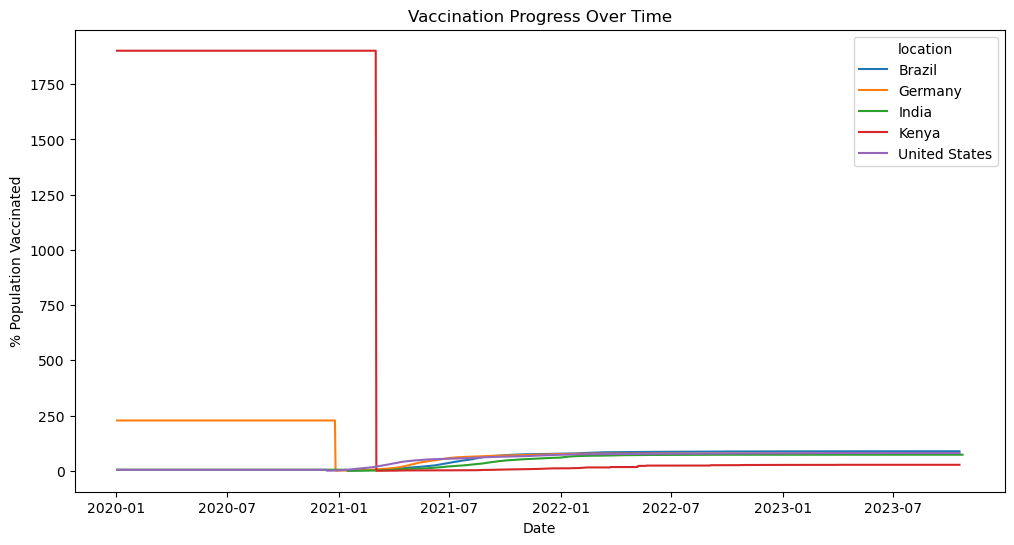

In [12]:
# ## Vaccination Progress

# Vaccination visualization
covid_df['vaccination_percentage'] = (covid_df['people_vaccinated'] / covid_df['population']) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='date', y='vaccination_percentage', hue='location')
plt.title('Vaccination Progress Over Time')
plt.ylabel('% Population Vaccinated')
plt.xlabel('Date')
plt.show()


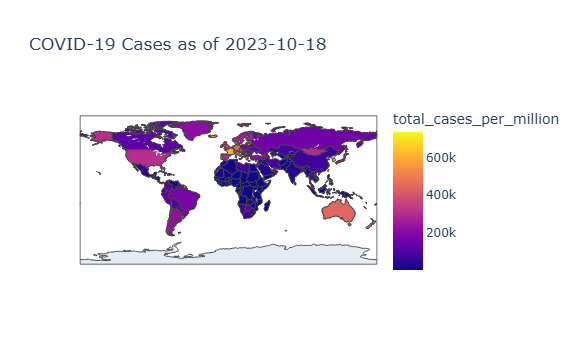

In [16]:
def fixed_choropleth():
    # Ensure we have valid data
    latest_global = df.dropna(subset=['iso_code', 'total_cases_per_million'])
    latest_global = latest_global[latest_global['date'] == latest_global['date'].max()]
    
    # Create fallback metric if primary is missing
    if latest_global.empty:
        print("No data available for the latest date")
        return None
        
    # Calculate relative metric if needed
    if 'total_cases_per_million' not in latest_global:
        latest_global['total_cases_per_million'] = (latest_global['total_cases'] / latest_global['population']) * 1e6
    
    fig = px.choropleth(latest_global,
                        locations="iso_code",
                        color="total_cases_per_million",
                        hover_name="location",
                        hover_data=['total_cases', 'total_deaths', 'population'],
                        color_continuous_scale=px.colors.sequential.Plasma,
                        scope="world",
                        title=f"COVID-19 Cases as of {latest_global['date'].max().strftime('%Y-%m-%d')}")
    
    # Set sensible color range
    max_value = latest_global['total_cases_per_million'].quantile(0.9)
    fig.update_layout(coloraxis=dict(cmax=max_value))
    
    return fig

# Display the map
choropleth = fixed_choropleth()
if choropleth:
    choropleth.show()
else:
    print("Could not generate map - check data availability")